# SPORTS BALL CLASSIFIER

In [2]:
# Let's make sure that the (fastai) deep learning package is up to date
! curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
# reading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# I will be storing all the images on the google drive
# importing google drive package
from google.colab import drive

In [5]:
from fastai.vision import *

In [40]:
# we will need to connect this file to google drive folder containing images
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
# saving the path to a project folder
path = 'gdrive/My Drive/Deep_Learning'

In [11]:
# creating a directory to store different images of balls with the path created above
(Path(path)/'Balls').mkdir(parents=True, exist_ok=True)

In [8]:
# creating a path to access the images of the balls
balls_path = 'gdrive/My Drive/Deep_Learning/Balls/'

In [9]:
# creating folders for different sports
folders = ['golf','baseball','cricket','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','volleyball','dragon','pool','hockey','softball']

In [14]:
# adding the names of folders in /Balls
for i in folders:
  path = Path(balls_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [10]:
# saving the fatsai path
f_path = Path(balls_path)

In [26]:
#splitting the data into our training set to train the data
np.random.seed(123)
data = ImageDataBunch.from_folder(f_path, train=".", valid_pct=0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [27]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

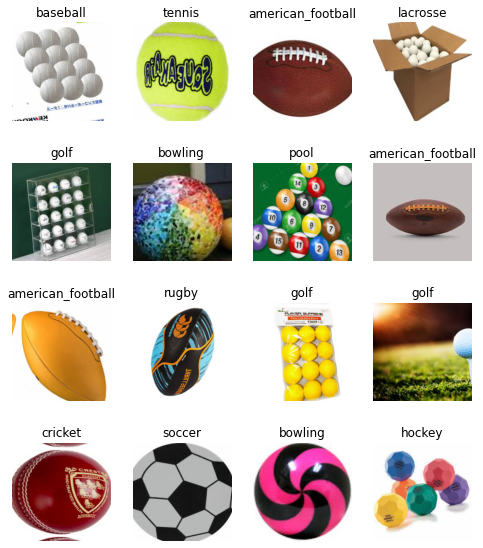

In [28]:
# let's see sample images
data.show_batch(rows=4, figsize=(7,8))

In [29]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 2059,
 514)

In [30]:
# Let's create cnn_learner object using resnet34 model. resnet34 is widely used transfer learning model for image classification.
# It is a part of PyTorch. 
model = cnn_learner(data, models.resnet34, metrics=error_rate)

In [31]:
# fitting the models by training 8 epochs of the model
model.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.902761,1.095967,0.324903,00:29
1,1.715943,0.897485,0.247082,00:28
2,1.222956,0.852749,0.245136,00:28
3,0.905219,0.773017,0.219844,00:28
4,0.699797,0.721488,0.212062,00:28
5,0.556122,0.689556,0.196498,00:28
6,0.451371,0.685091,0.194553,00:28
7,0.391571,0.691804,0.200389,00:28


In [32]:
# saving the models if in case we want to reuse it into the future
model.save('Model_1', return_path = True)

PosixPath('gdrive/My Drive/Deep_Learning/Balls/models/Model_1.pth')

In [33]:
model.unfreeze()
# This will let us train earlier layers.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


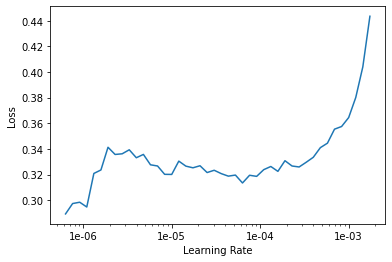

In [34]:
# finding the optimal learning rate
model.lr_find()
model.recorder.plot()

In [35]:
# Nothing better
interp = ClassificationInterpretation.from_learner(model)

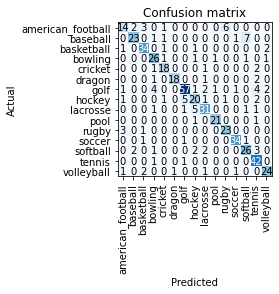

In [36]:
# plotting of the model on the validation set
interp.plot_confusion_matrix()

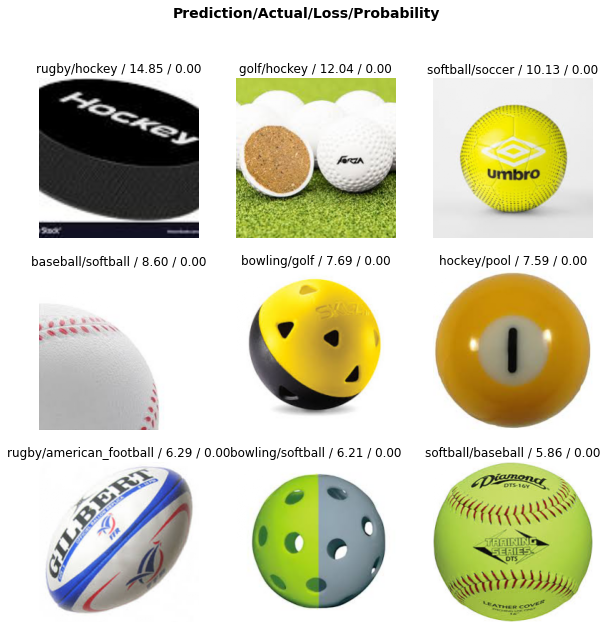

In [37]:
# looking at the balls having the biggest issue (most errors)
interp.plot_top_losses(9, figsize = (10,10))

In [53]:
# now checking the result by uploading a new image outside of our pool of images
# first creating a new folder through our path
(Path(path)/'Balls_pred').mkdir(parents=True, exist_ok=True)

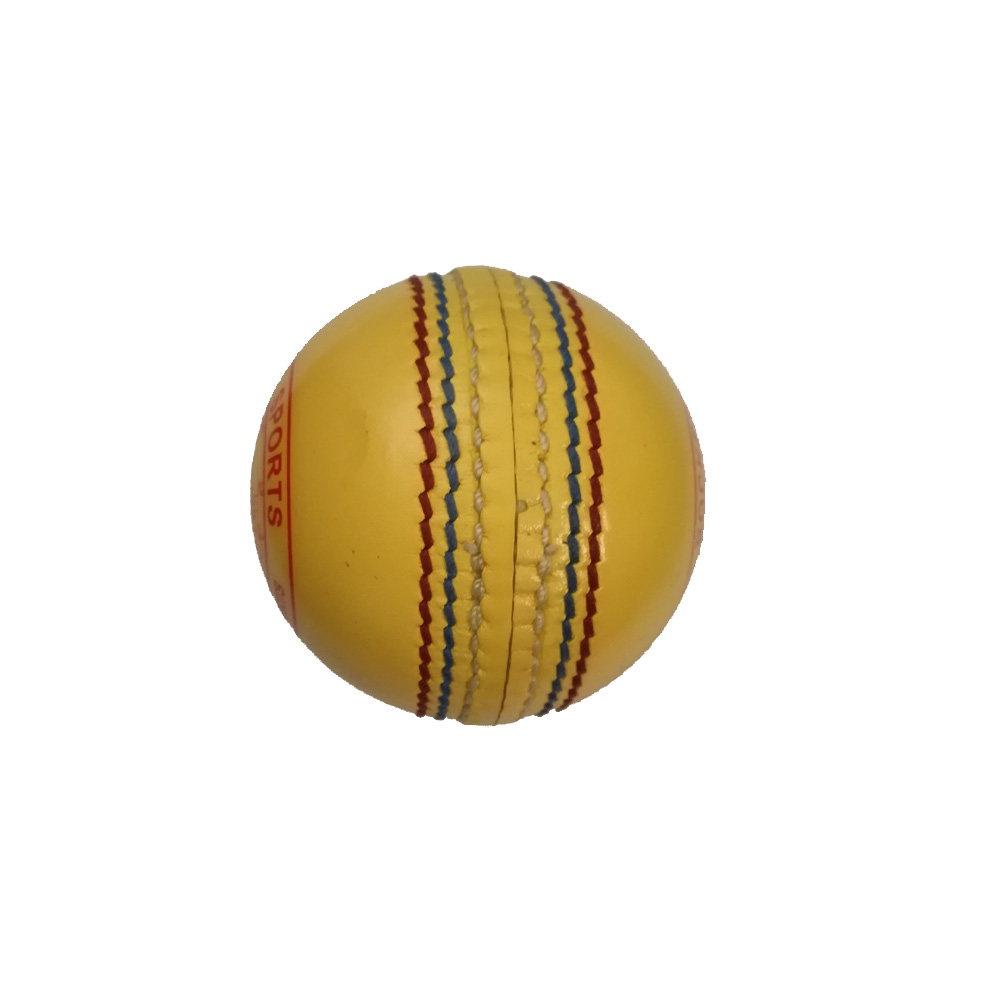

In [54]:
img = open_image(Path(path)/'Balls_pred'/'image1.jpg')
img

In [55]:
# Predicting the category of the new image of ball
pred_class,pred_idx,outputs = model.predict(img)
pred_class

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Category tensor(4)